In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# **CHUVA**


Chuva fraca: quando a intensidade é inferior a 5 mm/h.

Chuva moderada: quando a intensidade está entre 5 e 25 mm/h.

Chuva forte: quando a intensidade está compreendida entre 25,1 e 50 mm/h.

Chuva muito forte: quando a intensidade é igual ou superior a 50 mm/h.

Pancadas de chuva: Precipitação intensa ocorrida em curto período de tempo e espacialmente restrita.

Fonte: https://tinyurl.com/v4d72g5


# **VENTO**

Brisa: é um vento de pouca intensidade, com velocidade inferior a 54 km/h.

Ciclone: é o nome genérico para ventos circulares, como tufão, furacão, tornado e willy-willy. Caracteriza-se por uma tempestade violenta que ocorre em regiões tropicais ou subtropicais, produzida por grandes massas de ar em alta velocidade de rotação. Evidencia-se quando ventos os superam 50 km/h.

Furacão: vento circular forte, com velocidade igual ou superior a 108 km/h. Os furacões são os ciclones que surgem no mar do Caribe (Oceano Atlântico) ou nos EUA. Os ventos precisam ter mais de 119 km/h para uma tempestade ser considerada um furacão. Giram no sentido horário (no Hemisfério Sul) ou anti-horário (no Hemisfério Norte) e medem de 200 km a 400 km de diâmetro. Sua curva se assemelha a uma parabólica.

Tufão: é o nome que se dá aos ciclones formados no sul da Ásia e na parte ocidental do Oceano Índico, entre julho e outubro. É o mesmo que furacão, só que na região equatorial do Oceano Pacífico. Os tufões surgem no mar da China e atingem o leste asiático.

Willy-willy: nome que os ciclones recebem na Austrália e demais países do sul da Oceania.

Tornado: é o mais forte dos fenômenos meteorológicos, menor e mais intenso que os demais tipos de ciclone. Com alto poder de destruição, atinge até 490 km/h de velocidade no centro do cone. Produz fortes redemoinhos e eleva poeira. Forma-se entre 10 e 30 minutos e tem, no máximo, 10 km de diâmetro. O tornado é menor e em geral mais breve do que o furacão, e ocorre em zonas temperadas do Hemisfério Norte.

Vendaval: vento forte com um grande poder de destruição, que chega a atingir até 150 km/h. Ocorre geralmente de madrugada e sua duração pode ser de até cinco horas.

Fonte: https://www1.folha.uol.com.br/folha/mundo/furacao_pop_ventos.html

In [2]:
temperature = [5,    8,     10,   12,   14,    14,    18,    21,    21,     10,    23,   24,   24,    25,    25,   26,     26,    26,    27,    27,   28,    28,    30,    32,    32] #celsius
rainfall    = [0,    25,    0,    2,    0,     4,     0,     0,     7,      20,    5,    0,    12,    35,     7,    0,     23,    25,    32,    0,    3,     4,     0,     2,     5] #mm/hora
wind_speed  = [5,    8,     2,    22,   12,    8,     0,     58,    62,     25,    18,   5,    12,    35,     7,    0,     23,    25,    32,    0,    3,     4,     0,     5,     2] #km/h
did_bike    = [True, False, True, True, True,  True,  True,  False, False,  False, True, True, True,  False,  True, True,  False, False, False, True, False, False, False, False, False]

weather_conditions = []
for i in range(len(temperature)): 
  weather_conditions.append([temperature[i], rainfall[i], wind_speed[i]]) 

X = weather_conditions
y = did_bike

In [3]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [4]:
weather_conditions = [[22, 15, 10], [31, 8, 12], [6, 30, 5], [33, 40, 60]]

should_bike = clf.predict(weather_conditions)

print("should_bike", should_bike)

should_bike [ True False False False]


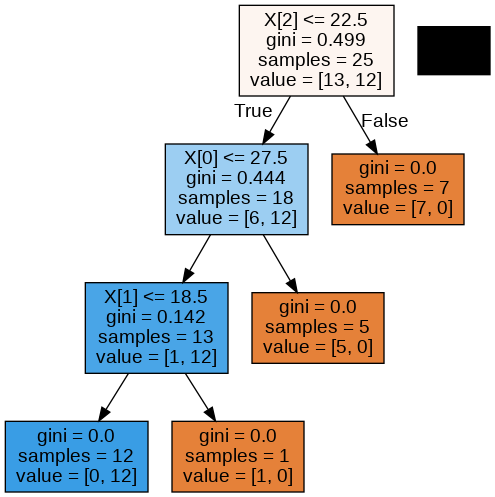

In [5]:
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Legal, vimos o Scikit Learn criar a árvore de decisão sozinho a partir dos dados, mas como ele sabe qual pergunta deve fazer antes. Por que ele verifica primeiro se a velocidade do vento é de 22.5 km/h? "Ora professor, porque isso tem mais chance de determinar se você não de bicicleta". Certo, mas como ele sabe isso? Vejam que não é óbvio como podemos determinar quais perguntas precisam ser feitas nem em qual ordem.